In [4]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/v_2'
import os

files = os.listdir(folder_path)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['barrenland', 'urban', '.DS_Store', 'grassland', 'agri']


In [3]:
!unzip /content/drive/MyDrive/v_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: v_2/agri/s1/ROIs1970_fall_s1_19_p253.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_19_p253.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_19_p535.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_19_p535.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_19_p44.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_19_p44.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_113_p473.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_113_p473.png  
  inflating: v_2/agri/s1/ROIs1868_summer_s1_59_p1036.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1868_summer_s1_59_p1036.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_115_p166.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_115_p166.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_133_p550.png  
  inflating: __MACOSX/v_2/agri/s1/._ROIs1970_fall_s1_133_p550.png  
  inflating: v_2/agri/s1/ROIs1970_fall_s1_113_p329.png  
  inflating: __MACOSX

In [5]:
import os
import glob
import time
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb

import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


torch.cuda.is_available()

False

In [28]:
# Calculate the split index based on the dataset size
split_index = int(0.8 * len(input_output_pairs))

train_pairs = input_output_pairs[:split_index]
val_pairs = input_output_pairs[split_index:]

# Calculate the split indices based on the dataset size
train_split_index = int(0.7 * len(input_output_pairs))  # 70% for training
val_split_index = int(0.85 * len(input_output_pairs))   # 15% for validation (70% + 15% = 85%)

# Split the dataset into training, validation, and test sets
train_pairs = input_output_pairs[:train_split_index]
val_pairs = input_output_pairs[train_split_index:val_split_index]
test_pairs = input_output_pairs[val_split_index:]

# Print sizes for verification
print(f"Training set size: {len(train_pairs)}")
print(f"Validation set size: {len(val_pairs)}")
print(f"Test set size: {len(test_pairs)}")


Training set size: 11200
Validation set size: 2400
Test set size: 2400


In [43]:
for filename, prediction in zip(test_generator.filenames, predictions):
    print(f"{filename}: Prediction: {float(prediction):.4f}")


<ipython-input-43-2be1cf41080e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{filename}: Prediction: {float(prediction):.4f}")


Streaming output truncated to the last 5000 lines.
urban/s1/ROIs1970_fall_s1_52_p41.png: Prediction: 0.4969
urban/s1/ROIs1970_fall_s1_52_p410.png: Prediction: 0.4899
urban/s1/ROIs1970_fall_s1_52_p411.png: Prediction: 0.5004
urban/s1/ROIs1970_fall_s1_52_p412.png: Prediction: 0.5160
urban/s1/ROIs1970_fall_s1_52_p413.png: Prediction: 0.4974
urban/s1/ROIs1970_fall_s1_52_p414.png: Prediction: 0.5156
urban/s1/ROIs1970_fall_s1_52_p415.png: Prediction: 0.4992
urban/s1/ROIs1970_fall_s1_52_p416.png: Prediction: 0.5090
urban/s1/ROIs1970_fall_s1_52_p417.png: Prediction: 0.4930
urban/s1/ROIs1970_fall_s1_52_p418.png: Prediction: 0.4944
urban/s1/ROIs1970_fall_s1_52_p419.png: Prediction: 0.5048
urban/s1/ROIs1970_fall_s1_52_p420.png: Prediction: 0.5050
urban/s1/ROIs1970_fall_s1_52_p434.png: Prediction: 0.5042
urban/s1/ROIs1970_fall_s1_52_p435.png: Prediction: 0.4892
urban/s1/ROIs1970_fall_s1_52_p436.png: Prediction: 0.5075
urban/s1/ROIs1970_fall_s1_52_p437.png: Prediction: 0.4897
urban/s1/ROIs1970_fall

In [44]:
print(predictions.shape)


(32000, 1)


In [45]:
for filename, prediction in zip(test_generator.filenames, predictions):
    print(f"{filename}: Prediction: {prediction[0]:.4f}")


Streaming output truncated to the last 5000 lines.
urban/s1/ROIs1970_fall_s1_52_p41.png: Prediction: 0.4969
urban/s1/ROIs1970_fall_s1_52_p410.png: Prediction: 0.4899
urban/s1/ROIs1970_fall_s1_52_p411.png: Prediction: 0.5004
urban/s1/ROIs1970_fall_s1_52_p412.png: Prediction: 0.5160
urban/s1/ROIs1970_fall_s1_52_p413.png: Prediction: 0.4974
urban/s1/ROIs1970_fall_s1_52_p414.png: Prediction: 0.5156
urban/s1/ROIs1970_fall_s1_52_p415.png: Prediction: 0.4992
urban/s1/ROIs1970_fall_s1_52_p416.png: Prediction: 0.5090
urban/s1/ROIs1970_fall_s1_52_p417.png: Prediction: 0.4930
urban/s1/ROIs1970_fall_s1_52_p418.png: Prediction: 0.4944
urban/s1/ROIs1970_fall_s1_52_p419.png: Prediction: 0.5048
urban/s1/ROIs1970_fall_s1_52_p420.png: Prediction: 0.5050
urban/s1/ROIs1970_fall_s1_52_p434.png: Prediction: 0.5042
urban/s1/ROIs1970_fall_s1_52_p435.png: Prediction: 0.4892
urban/s1/ROIs1970_fall_s1_52_p436.png: Prediction: 0.5075
urban/s1/ROIs1970_fall_s1_52_p437.png: Prediction: 0.4897
urban/s1/ROIs1970_fall

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the weights (if needed)
# model.load_weights('path/to/your/weights.h5')

# Create an ImageDataGenerator for prediction
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/v_2',  # Replace with your dataset path
    target_size=(256, 256),
    batch_size=1,       # Set to 1 to process one image at a time
    class_mode=None,    # No labels, we only want the images
    shuffle=False       # Ensure the order is preserved
)

# Predict the classes
predictions = model.predict(test_generator, steps=test_generator.samples, verbose=1)

# Print the shape of predictions for debugging
print("Predictions shape:", predictions.shape)

# Print predictions along with the image filenames
for filename, prediction in zip(test_generator.filenames, predictions):
    # Adjust indexing based on the shape of predictions
    if predictions.shape[1] == 1:
        print(f"{filename}: Prediction: {prediction[0]:.4f}")
    else:
        print(f"{filename}: Prediction: {prediction[1]:.4f}")


Streaming output truncated to the last 5000 lines.
urban/s1/ROIs1970_fall_s1_52_p41.png: Prediction: 0.5312
urban/s1/ROIs1970_fall_s1_52_p410.png: Prediction: 0.5384
urban/s1/ROIs1970_fall_s1_52_p411.png: Prediction: 0.5499
urban/s1/ROIs1970_fall_s1_52_p412.png: Prediction: 0.5421
urban/s1/ROIs1970_fall_s1_52_p413.png: Prediction: 0.5593
urban/s1/ROIs1970_fall_s1_52_p414.png: Prediction: 0.5291
urban/s1/ROIs1970_fall_s1_52_p415.png: Prediction: 0.5281
urban/s1/ROIs1970_fall_s1_52_p416.png: Prediction: 0.5446
urban/s1/ROIs1970_fall_s1_52_p417.png: Prediction: 0.5399
urban/s1/ROIs1970_fall_s1_52_p418.png: Prediction: 0.5426
urban/s1/ROIs1970_fall_s1_52_p419.png: Prediction: 0.5316
urban/s1/ROIs1970_fall_s1_52_p420.png: Prediction: 0.5482
urban/s1/ROIs1970_fall_s1_52_p434.png: Prediction: 0.5158
urban/s1/ROIs1970_fall_s1_52_p435.png: Prediction: 0.5303
urban/s1/ROIs1970_fall_s1_52_p436.png: Prediction: 0.5464
urban/s1/ROIs1970_fall_s1_52_p437.png: Prediction: 0.5143
urban/s1/ROIs1970_fall

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Updating paths to match your dataset structure
base_dir = "/content/v_2"
categories = ['agri', 'barrenland', 'grassland', 'urban']

# Collecting all pairs of input and output image paths
input_output_pairs = []
for category in categories:
    input_folder = os.path.join(base_dir, category, 's1')
    output_folder = os.path.join(base_dir, category, 's2')

    # Assuming filenames are the same between s1 and s2 for corresponding images
    input_images = sorted(glob.glob(os.path.join(input_folder, "*.png")))
    output_images = sorted(glob.glob(os.path.join(output_folder, "*.png")))

    for input_img, output_img in zip(input_images, output_images):
        input_output_pairs.append((input_img, output_img))

# Checking the size of the dataset
print(f"Size of dataset: {len(input_output_pairs)}")


Size of dataset: 16000


In [51]:
# Shuffle and split the dataset into training and validation sets
np.random.seed(123)  # Seeding for reproducible results
input_output_pairs = np.random.permutation(input_output_pairs)  # Shuffling the pairs

# Determine the split index based on the actual size of your dataset
split_index = int(0.8 * len(input_output_pairs))  # 80% for training, 20% for validation

train_pairs = input_output_pairs[:split_index]  # Using the first part for training
val_pairs = input_output_pairs[split_index:]    # Using the second part for validating

print(f"Training pairs: {len(train_pairs)}, Validation pairs: {len(val_pairs)}")


Training pairs: 12800, Validation pairs: 3200


In [52]:
def create_image_generator(pairs, batch_size=1, target_size=(256, 256)):
    while True:
        np.random.shuffle(pairs)  # Shuffle pairs each epoch
        for i in range(0, len(pairs), batch_size):
            batch_pairs = pairs[i:i+batch_size]
            input_images = []
            output_images = []
            for input_path, output_path in batch_pairs:
                input_img = load_img(input_path, target_size=target_size)
                output_img = load_img(output_path, target_size=target_size)
                input_images.append(img_to_array(input_img))
                output_images.append(img_to_array(output_img))
            yield (np.array(input_images) / 255.0, np.array(output_images) / 255.0)


In [53]:
# Create data generators
train_generator = create_image_generator(train_pairs, batch_size=32)
val_generator = create_image_generator(val_pairs, batch_size=32)

# Fetch a batch from the train generator
inputs, outputs = next(train_generator)
print(f"Input batch shape: {inputs.shape}")
print(f"Output batch shape: {outputs.shape}")


Input batch shape: (32, 256, 256, 3)
Output batch shape: (32, 256, 256, 3)


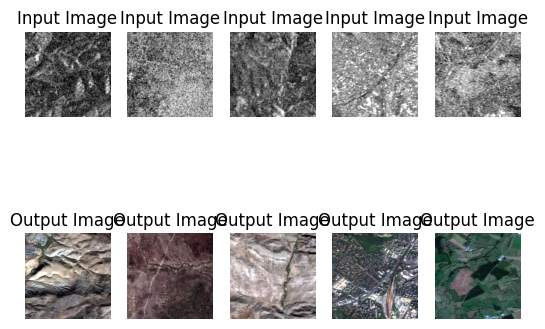

In [54]:
import matplotlib.pyplot as plt

# Fetch a batch from the generator
inputs, outputs = next(train_generator)

# Display example images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(inputs[i])
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(outputs[i])
    plt.title("Output Image")
    plt.axis('off')

plt.show()


In [59]:
import os

# Check if the paths are directories or files
print("Input path is directory:", os.path.isdir(example_input_path))
print("Ground truth path is directory:", os.path.isdir(example_ground_truth_path))

# List files in the directory to confirm
if os.path.isdir(example_input_path):
    print("Files in input directory:", os.listdir(example_input_path))


Input path is directory: True
Ground truth path is directory: True
Files in input directory: ['ROIs1868_summer_s1_59_p148.png', 'ROIs1970_fall_s1_29_p118.png', 'ROIs1970_fall_s1_113_p107.png', 'ROIs1970_fall_s1_29_p524.png', 'ROIs1868_summer_s1_59_p669.png', 'ROIs1970_fall_s1_19_p756.png', 'ROIs1970_fall_s1_29_p197.png', 'ROIs1970_fall_s1_29_p631.png', 'ROIs1970_fall_s1_19_p941.png', 'ROIs1970_fall_s1_113_p269.png', 'ROIs1868_summer_s1_59_p728.png', 'ROIs1970_fall_s1_19_p154.png', 'ROIs1868_summer_s1_59_p1021.png', 'ROIs1970_fall_s1_19_p826.png', 'ROIs1868_summer_s1_59_p473.png', 'ROIs1970_fall_s1_133_p367.png', 'ROIs1970_fall_s1_29_p394.png', 'ROIs1970_fall_s1_113_p177.png', 'ROIs1868_summer_s1_59_p1026.png', 'ROIs1868_summer_s1_59_p895.png', 'ROIs1868_summer_s1_59_p703.png', 'ROIs1868_summer_s1_59_p1040.png', 'ROIs1970_fall_s1_29_p374.png', 'ROIs1868_summer_s1_59_p938.png', 'ROIs1970_fall_s1_29_p334.png', 'ROIs1970_fall_s1_113_p18.png', 'ROIs1868_summer_s1_59_p117.png', 'ROIs1970_fal

In [60]:
import os
import glob

# Base directory and category
base_dir = "/content/v_2/agri/s1"  # Example directory path
image_files = glob.glob(os.path.join(base_dir, "*.png"))

# Check if there are any image files
if image_files:
    example_input_path = image_files[0]  # Use the first image file for testing
else:
    raise FileNotFoundError("No image files found in the specified directory.")

# Update the path to ground truth similarly
ground_truth_base_dir = "/content/v_2/agri/s2"
ground_truth_image_files = glob.glob(os.path.join(ground_truth_base_dir, "*.png"))

if ground_truth_image_files:
    example_ground_truth_path = ground_truth_image_files[0]  # Use the first image file for testing
else:
    raise FileNotFoundError("No ground truth image files found in the specified directory.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


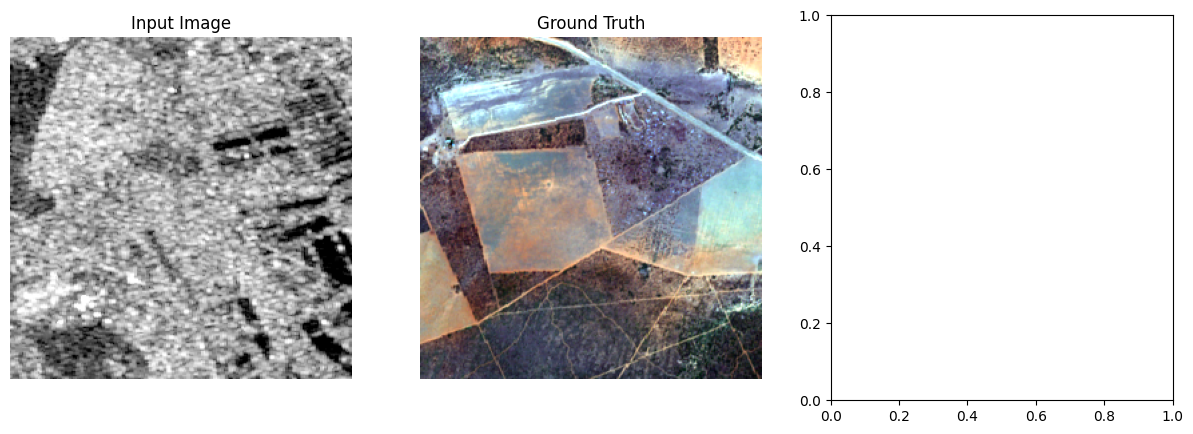

In [64]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def show_images(input_image, output_image, prediction_image):
    _, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(input_image)
    axes[0].set_title("Input Image")
    axes[0].axis("off")

    axes[1].imshow(output_image)
    axes[1].set_title("Ground Truth")
    axes[1].axis("off")

    plt.show()

def preprocess_image(image_path, target_size=(256, 256)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Normalize
    return image, image_array

# Load and preprocess images
input_image, preprocessed_image = preprocess_image(example_input_path)
output_image = Image.open(example_ground_truth_path)

# Make prediction
# Assuming 'model' is your trained model
prediction = model.predict(preprocessed_image)
prediction_image = np.squeeze(prediction)  # Remove batch dimension
prediction_image = np.clip(prediction_image * 255.0, 0, 255).astype(np.uint8)

# If the output is in grayscale or single channel, convert to RGB for display
if len(prediction_image.shape) == 2:
    prediction_image = np.stack([prediction_image] * 3, axis=-1)

# Display the images
show_images(input_image, output_image, prediction_image)


In [70]:
class ColorizationDataset(Dataset):
    def __init__(self, pairs, split='train', transform=None):
        self.pairs = pairs
        self.split = split
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        input_img_path, output_img_path = self.pairs[idx]

        # Load images
        input_image = Image.open(input_img_path).convert('L')  # Grayscale for input
        output_image = Image.open(output_img_path).convert('RGB')  # RGB for output

        if self.transform:
            input_image = self.transform(input_image)
            output_image = self.transform(output_image)

        return {'L': input_image, 'ab': output_image}

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Create data loaders
def make_dataloaders(batch_size=16, n_workers=0, pin_memory=False, **kwargs):
    dataset = ColorizationDataset(**kwargs, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=n_workers, pin_memory=pin_memory)
    return dataloader

In [71]:
# Assuming train_pairs and val_pairs are already defined
train_dl = make_dataloaders(batch_size=16, pairs=train_pairs, split='train')
val_dl = make_dataloaders(batch_size=16, pairs=val_pairs, split='val')


In [72]:
# Fetch the first batch of data
data = next(iter(train_dl))
Ls, abs_ = data['L'], data['ab']

# Print the shapes of the tensors and the lengths of the DataLoaders
print(f"Training batch shapes: L: {Ls.shape}, ab: {abs_.shape}")
print(f"Number of training batches: {len(train_dl)}")
print(f"Number of validation batches: {len(val_dl)}")


Training batch shapes: L: torch.Size([16, 1, 256, 256]), ab: torch.Size([16, 3, 256, 256])
Number of training batches: 800
Number of validation batches: 200


In [76]:
import torch
import torch.nn as nn

class UnetBlock(nn.Module):
    def __init__(self, nf, ni, submodule=None, input_c=None, dropout=False,
                 innermost=False, outermost=False):
        super().__init__()
        self.outermost = outermost
        if input_c is None: input_c = nf
        downconv = nn.Conv2d(input_c, ni, kernel_size=4,
                             stride=2, padding=1, bias=False)
        downrelu = nn.LeakyReLU(0.2, True)
        downnorm = nn.BatchNorm2d(ni)
        uprelu = nn.ReLU(True)
        upnorm = nn.BatchNorm2d(nf)

        if outermost:
            upconv = nn.ConvTranspose2d(ni * 2, nf, kernel_size=4,
                                        stride=2, padding=1)
            down = [downconv]
            up = [uprelu, upconv, nn.Tanh()]
            model = down + [submodule] + up
        elif innermost:
            upconv = nn.ConvTranspose2d(ni, nf, kernel_size=4,
                                        stride=2, padding=1, bias=False)
            down = [downrelu, downconv]
            up = [uprelu, upconv, upnorm]
            model = down + up
        else:
            upconv = nn.ConvTranspose2d(ni * 2, nf, kernel_size=4,
                                        stride=2, padding=1, bias=False)
            down = [downrelu, downconv, downnorm]
            up = [uprelu, upconv, upnorm]
            if dropout: up += [nn.Dropout(0.5)]
            model = down + [submodule] + up
        self.model = nn.Sequential(*model)

    def forward(self, x):
        if self.outermost:
            return self.model(x)
        else:
            return torch.cat([x, self.model(x)], 1)

class Unet(nn.Module):
    def __init__(self, input_c=1, output_c=2, n_down=8, num_filters=64):
        super().__init__()
        unet_block = UnetBlock(num_filters * 8, num_filters * 8, innermost=True)
        for _ in range(n_down - 5):
            unet_block = UnetBlock(num_filters * 8, num_filters * 8, submodule=unet_block, dropout=True)
        out_filters = num_filters * 8
        for _ in range(3):
            unet_block = UnetBlock(out_filters // 2, out_filters, submodule=unet_block)
            out_filters //= 2
        self.model = UnetBlock(output_c, out_filters, input_c=input_c, submodule=unet_block, outermost=True)

    def forward(self, x):
        return self.model(x)


In [77]:
import torch.optim as optim
import torch.nn as nn

# Initialize the model
model = Unet(input_c=1, output_c=3, n_down=8, num_filters=64).cuda()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # or another suitable loss function
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Your training and testing code here


In [78]:
def train(model, train_dl, val_dl, criterion, optimizer, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch in train_dl:
            inputs = batch['L'].cuda()
            targets = batch['ab'].cuda()

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_dl.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_dl:
                inputs = batch['L'].cuda()
                targets = batch['ab'].cuda()

                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        epoch_val_loss = val_loss / len(val_dl.dataset)
        print(f'Validation Loss: {epoch_val_loss:.4f}')

        model.train()

# Start training
train(model, train_dl, val_dl, criterion, optimizer, num_epochs=10)


Epoch 1/10, Loss: 0.0503
Validation Loss: 0.0397


KeyboardInterrupt: 

In [79]:
def test(model, test_dl):
    model.eval()
    with torch.no_grad():
        for batch in test_dl:
            inputs = batch['L'].cuda()
            targets = batch['ab'].cuda()

            outputs = model(inputs)
            # Here you can compute and print metrics or visualize the outputs
            # For instance:
            print("Test batch:")
            print(f"Inputs shape: {inputs.shape}")
            print(f"Targets shape: {targets.shape}")
            print(f"Outputs shape: {outputs.shape}")

# Use the validation data loader for testing
test(model, val_dl)


Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Size([16, 3, 256, 256])
Test batch:
Inputs shape: torch.Size([16, 1, 256, 256])
Targets shape: torch.Size([16, 3, 256, 256])
Outputs shape: torch.Si

In [80]:
class PatchDiscriminator(nn.Module):
    def __init__(self, input_c, num_filters=64, n_down=3):
        super().__init__()
        model = [self.get_layers(input_c, num_filters, norm=False)]
        model += [self.get_layers(num_filters * 2 ** i, num_filters * 2 ** (i + 1), s=1 if i == (n_down-1) else 2)
                  for i in range(n_down)]
        model += [self.get_layers(num_filters * 2 ** n_down, 1, s=1, norm=False, act=False)]
        self.model = nn.Sequential(*model)

    def get_layers(self, ni, nf, k=4, s=2, p=1, norm=True, act=True):
        layers = [nn.Conv2d(ni, nf, k, s, p, bias=not norm)]
        if norm: layers += [nn.BatchNorm2d(nf)]
        if act: layers += [nn.LeakyReLU(0.2, True)]
        return nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [81]:
# Initialize the models
generator = Unet(input_c=1, output_c=3, n_down=8, num_filters=64).cuda()
discriminator = PatchDiscriminator(input_c=4, num_filters=64).cuda()  # input_c = 1 (L channel) + 3 (generated RGB)

# Define the loss functions
adversarial_loss = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Logits for the discriminator
l1_loss = nn.L1Loss()  # L1 loss for pixel-wise loss between generated and real images

# Define the optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [84]:
# Define the number of epochs and logging interval
num_epochs = 50  # or any other number you wish to train for
log_interval = 10  # Adjust the interval at which you want to log the losses

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(train_dl):
        L_channel, ab_channel = data['L'].cuda(), data['ab'].cuda()

        # Generate fake images from L channel
        fake_images = generator(L_channel)

        # Prepare real and fake labels
        real_labels = torch.ones(L_channel.size(0), 1, 30, 30).cuda()  # Adjust size according to discriminator output
        fake_labels = torch.zeros(L_channel.size(0), 1, 30, 30).cuda()

        ### Train Discriminator ###
        optimizer_D.zero_grad()

        # Real images
        real_input = torch.cat((L_channel, ab_channel), dim=1)
        real_output = discriminator(real_input)
        real_loss = adversarial_loss(real_output, real_labels)

        # Fake images
        fake_input = torch.cat((L_channel, fake_images), dim=1)
        fake_output = discriminator(fake_input.detach())
        fake_loss = adversarial_loss(fake_output, fake_labels)

        # Discriminator loss
        d_loss = (real_loss + fake_loss) * 0.5
        d_loss.backward()
        optimizer_D.step()

        ### Train Generator ###
        optimizer_G.zero_grad()

        fake_output = discriminator(fake_input)
        g_loss = adversarial_loss(fake_output, real_labels) + l1_loss(fake_images, ab_channel) * 100  # Combine adversarial and L1 losses
        g_loss.backward()
        optimizer_G.step()

        if i % log_interval == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dl)}], "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch [1/50], Step [1/800], D Loss: 0.7124, G Loss: 59.2431
Epoch [1/50], Step [11/800], D Loss: 0.5442, G Loss: 25.4850
Epoch [1/50], Step [21/800], D Loss: 0.2726, G Loss: 21.6015
Epoch [1/50], Step [31/800], D Loss: 0.1419, G Loss: 19.3254
Epoch [1/50], Step [41/800], D Loss: 0.0723, G Loss: 20.9553
Epoch [1/50], Step [51/800], D Loss: 2.1263, G Loss: 20.0971
Epoch [1/50], Step [61/800], D Loss: 0.1894, G Loss: 20.5697
Epoch [1/50], Step [71/800], D Loss: 0.8032, G Loss: 21.1614
Epoch [1/50], Step [81/800], D Loss: 0.0848, G Loss: 21.9817
Epoch [1/50], Step [91/800], D Loss: 0.1314, G Loss: 19.7909
Epoch [1/50], Step [101/800], D Loss: 0.6150, G Loss: 21.1565
Epoch [1/50], Step [111/800], D Loss: 0.4197, G Loss: 18.7223
Epoch [1/50], Step [121/800], D Loss: 0.1209, G Loss: 19.5044
Epoch [1/50], Step [131/800], D Loss: 0.8383, G Loss: 18.8293
Epoch [1/50], Step [141/800], D Loss: 0.1293, G Loss: 18.9688
Epoch [1/50], Step [151/800], D Loss: 0.2249, G Loss: 23.6489
Epoch [1/50], Step 

KeyboardInterrupt: 

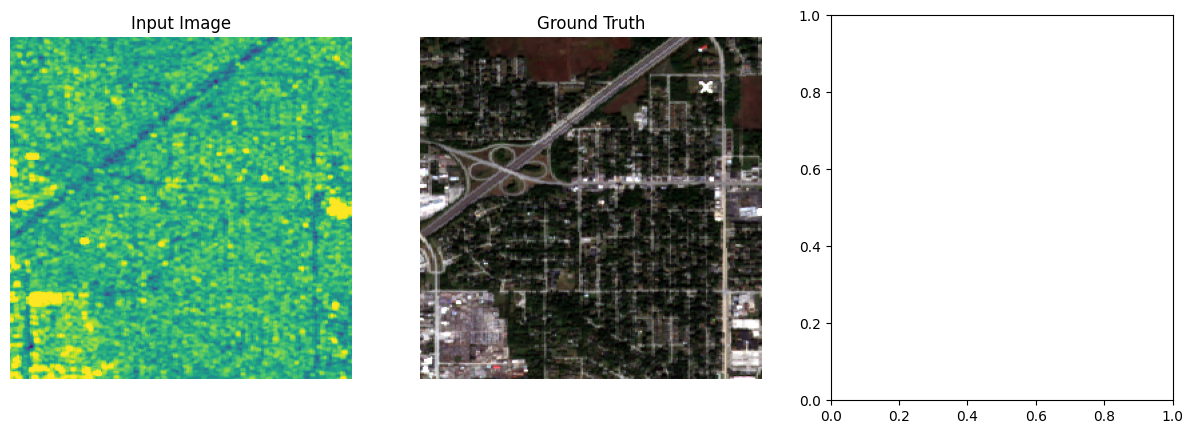

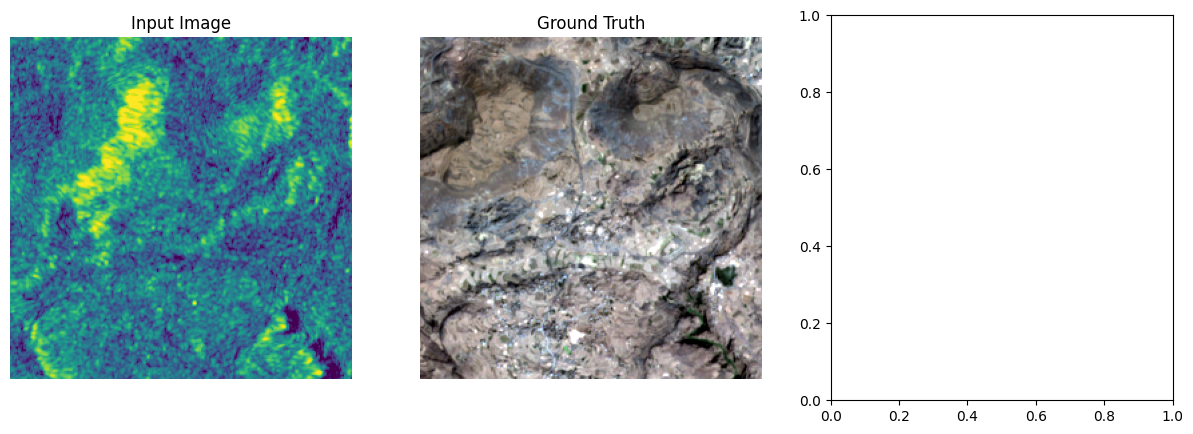

In [86]:
# Function to convert a single-channel image to a 2D array (grayscale) or RGB format
def tensor_to_image(tensor):
    # If the tensor has a single channel, remove the channel dimension
    if tensor.shape[0] == 1:
        return tensor.squeeze(0).numpy()
    # If the tensor has multiple channels, transpose it to (H, W, C) format
    elif tensor.shape[0] == 2:  # For `ab_channel`, which has 2 channels
        return tensor.permute(1, 2, 0).numpy()
    elif tensor.shape[0] == 3:  # For `generated_images`, which has 3 channels
        return tensor.permute(1, 2, 0).numpy()

# Fetch a batch from the validation dataloader
data = next(iter(val_dl))
L_channel, ab_channel = data['L'].cuda(), data['ab'].cuda()

# Generate images
with torch.no_grad():
    generated_images = generator(L_channel)

# Convert to CPU
L_channel, ab_channel, generated_images = L_channel.cpu(), ab_channel.cpu(), generated_images.cpu()

# Visualize some results
for i in range(min(4, len(L_channel))):
    # Convert tensors to images
    input_image = tensor_to_image(L_channel[i])
    ground_truth_image = tensor_to_image(ab_channel[i])
    predicted_image = tensor_to_image(generated_images[i])

    # Display the images
    show_images(input_image, ground_truth_image, predicted_image)


In [87]:
PatchDiscriminator(100)

PatchDiscriminator(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(100, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
   

In [89]:
discriminator = PatchDiscriminator(3)
dummy_input = torch.randn(16, 3, 256, 256) # batch_size, channels, size, size
out = discriminator(dummy_input)
out.shape


torch.Size([16, 1, 30, 30])

In [94]:
class GANLoss(nn.Module):
    def __init__(self, gan_mode='vanilla', real_label=1.0, fake_label=0.0):
        super().__init__()
        self.register_buffer('real_label', torch.tensor(real_label))
        self.register_buffer('fake_label', torch.tensor(fake_label))
        if gan_mode == 'vanilla':
            self.loss = nn.BCEWithLogitsLoss()
        elif gan_mode == 'lsgan':
            self.loss = nn.MSELoss()

    def get_labels(self, preds, target_is_real):
        if target_is_real:
            labels = self.real_label
        else:
            labels = self.fake_label
        return labels.expand_as(preds)

    def __call__(self, preds, target_is_real):
        labels = self.get_labels(preds, target_is_real)
        loss = self.loss(preds, labels)
        return loss

In [96]:
def init_weights(net, init='norm', gain=0.02):

    def init_func(m):
        classname = m.__class__.__name__
        if hasattr(m, 'weight') and 'Conv' in classname:
            if init == 'norm':
                nn.init.normal_(m.weight.data, mean=0.0, std=gain)
            elif init == 'xavier':
                nn.init.xavier_normal_(m.weight.data, gain=gain)
            elif init == 'kaiming':
                nn.init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')

            if hasattr(m, 'bias') and m.bias is not None:
                nn.init.constant_(m.bias.data, 0.0)
        elif 'BatchNorm2d' in classname:
            nn.init.normal_(m.weight.data, 1., gain)
            nn.init.constant_(m.bias.data, 0.)

    net.apply(init_func)
    print(f"model initialized with {init} initialization")
    return net

def init_model(model, device):
    model = model.to(device)
    model = init_weights(model)
    return model

In [97]:
class MainModel(nn.Module):
    def __init__(self, net_G=None, lr_G=2e-4, lr_D=2e-4,
                 beta1=0.5, beta2=0.999, lambda_L1=100.):
        super().__init__()

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.lambda_L1 = lambda_L1

        if net_G is None:
            self.net_G = init_model(Unet(input_c=1, output_c=2, n_down=8, num_filters=64), self.device)
        else:
            self.net_G = net_G.to(self.device)
        self.net_D = init_model(PatchDiscriminator(input_c=3, n_down=3, num_filters=64), self.device)
        self.GANcriterion = GANLoss(gan_mode='vanilla').to(self.device)
        self.L1criterion = nn.L1Loss()
        self.opt_G = optim.Adam(self.net_G.parameters(), lr=lr_G, betas=(beta1, beta2))
        self.opt_D = optim.Adam(self.net_D.parameters(), lr=lr_D, betas=(beta1, beta2))

    def set_requires_grad(self, model, requires_grad=True):
        for p in model.parameters():
            p.requires_grad = requires_grad

    def setup_input(self, data):
        self.L = data['L'].to(self.device)
        self.ab = data['ab'].to(self.device)

    def forward(self):
        self.fake_color = self.net_G(self.L)

    def backward_D(self):
        fake_image = torch.cat([self.L, self.fake_color], dim=1)
        fake_preds = self.net_D(fake_image.detach())
        self.loss_D_fake = self.GANcriterion(fake_preds, False)
        real_image = torch.cat([self.L, self.ab], dim=1)
        real_preds = self.net_D(real_image)
        self.loss_D_real = self.GANcriterion(real_preds, True)
        self.loss_D = (self.loss_D_fake + self.loss_D_real) * 0.5
        self.loss_D.backward()

    def backward_G(self):
        fake_image = torch.cat([self.L, self.fake_color], dim=1)
        fake_preds = self.net_D(fake_image)
        self.loss_G_GAN = self.GANcriterion(fake_preds, True)
        self.loss_G_L1 = self.L1criterion(self.fake_color, self.ab) * self.lambda_L1
        self.loss_G = self.loss_G_GAN + self.loss_G_L1
        self.loss_G.backward()

    def optimize(self):
        self.forward()
        self.net_D.train()
        self.set_requires_grad(self.net_D, True)
        self.opt_D.zero_grad()
        self.backward_D()
        self.opt_D.step()

        self.net_G.train()
        self.set_requires_grad(self.net_D, False)
        self.opt_G.zero_grad()
        self.backward_G()
        self.opt_G.step()

In [98]:
class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.count, self.avg, self.sum = [0.] * 3

    def update(self, val, count=1):
        self.count += count
        self.sum += count * val
        self.avg = self.sum / self.count

def create_loss_meters():
    loss_D_fake = AverageMeter()
    loss_D_real = AverageMeter()
    loss_D = AverageMeter()
    loss_G_GAN = AverageMeter()
    loss_G_L1 = AverageMeter()
    loss_G = AverageMeter()

    return {'loss_D_fake': loss_D_fake,
            'loss_D_real': loss_D_real,
            'loss_D': loss_D,
            'loss_G_GAN': loss_G_GAN,
            'loss_G_L1': loss_G_L1,
            'loss_G': loss_G}

def update_losses(model, loss_meter_dict, count):
    for loss_name, loss_meter in loss_meter_dict.items():
        loss = getattr(model, loss_name)
        loss_meter.update(loss.item(), count=count)

def lab_to_rgb(L, ab):
    """
    Takes a batch of images
    """

    L = (L + 1.) * 50.
    ab = ab * 110.
    Lab = torch.cat([L, ab], dim=1).permute(0, 2, 3, 1).cpu().numpy()
    rgb_imgs = []
    for img in Lab:
        img_rgb = lab2rgb(img)
        rgb_imgs.append(img_rgb)
    return np.stack(rgb_imgs, axis=0)

def visualize(model, data, save=True):
    model.net_G.eval()
    with torch.no_grad():
        model.setup_input(data)
        model.forward()
    model.net_G.train()
    fake_color = model.fake_color.detach()
    real_color = model.ab
    L = model.L
    fake_imgs = lab_to_rgb(L, fake_color)
    real_imgs = lab_to_rgb(L, real_color)
    fig = plt.figure(figsize=(15, 8))
    for i in range(5):
        ax = plt.subplot(3, 5, i + 1)
        ax.imshow(L[i][0].cpu(), cmap='gray')
        ax.axis("off")
        ax = plt.subplot(3, 5, i + 1 + 5)
        ax.imshow(fake_imgs[i])
        ax.axis("off")
        ax = plt.subplot(3, 5, i + 1 + 10)
        ax.imshow(real_imgs[i])
        ax.axis("off")
    plt.show()
    if save:
        fig.savefig(f"colorization_{time.time()}.png")

def log_results(loss_meter_dict):
    for loss_name, loss_meter in loss_meter_dict.items():
        print(f"{loss_name}: {loss_meter.avg:.5f}")

In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple model
class MainModel(nn.Module):
    def __init__(self):
        super(MainModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 28 * 28, 10)  # Adjust size accordingly

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc1(x)
        return x

# Initialize the model
model = MainModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Sample data loaders (Replace with actual data loaders)
train_dl = DataLoader(TensorDataset(torch.randn(100, 1, 28, 28), torch.randint(0, 10, (100,))), batch_size=32, shuffle=True)
val_dl = DataLoader(TensorDataset(torch.randn(20, 1, 28, 28), torch.randint(0, 10, (20,))), batch_size=32, shuffle=False)

# Training function
def train_model(model, train_dl, epochs, display_every=800):
    for e in range(epochs):
        model.train()
        for i, (inputs, labels) in enumerate(train_dl):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            if i % display_every == 0:
                print(f"Epoch {e+1}/{epochs}, Iteration {i}/{len(train_dl)}, Loss: {loss.item()}")

# Testing function
def test_model(model, test_dl):
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_dl:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            print(f"Test Loss: {loss.item()}")

# Train and test the model
train_model(model, train_dl, epochs=5)
test_model(model, val_dl)


Epoch 1/5, Iteration 0/4, Loss: 2.349618911743164
Epoch 2/5, Iteration 0/4, Loss: 0.4004298448562622
Epoch 3/5, Iteration 0/4, Loss: 0.0377492755651474
Epoch 4/5, Iteration 0/4, Loss: 0.010876963846385479
Epoch 5/5, Iteration 0/4, Loss: 0.001122900634072721
Test Loss: 5.018704891204834


In [1]:
import torch

def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data['L'].to(device), data['ab'].to(device)  # Replace 'ab' with actual labels
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    return accuracy

# Example usage
train_accuracy = calculate_accuracy(model, train_dl, device)
print(f"Training Accuracy: {train_accuracy:.2f}%")


NameError: name 'model' is not defined